In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [2]:
filename = 'result.txt'

In [14]:
column_names = 'STN,YYYYMMDD,TG,TN,TX'.split(',')
df = pd.read_csv(filename, comment='#', names = column_names)
df

,STN,YYYYMMDD,TG,TN,TX
0,260,20220101,123,109,132
1,260,20220102,117,102,130
2,260,20220103,97,88,110
3,260,20220104,65,32,89
4,260,20220105,51,23,76
...,...,...,...,...,...
725,380,20221227,52,35,83
726,380,20221228,91,62,108
727,380,20221229,94,61,118
728,380,20221230,92,47,139


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   STN       730 non-null    int64
 1   YYYYMMDD  730 non-null    int64
 2   TG        730 non-null    int64
 3   TN        730 non-null    int64
 4   TX        730 non-null    int64
dtypes: int64(5)
memory usage: 28.6 KB


# Data Wrangling

In [15]:
df[['GEM','MIN','MAX']] = df[['TG','TN','TX']] * 0.1

In [20]:
df['DATUM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d')

In [24]:
stations = {
    260: 'De Bilt',
    380: 'Maastricht'
}
df['STATION'] = df['STN'].replace(stations)

In [27]:
df = df[['GEM','MIN','MAX','DATUM','STATION']]

In [28]:
df

,GEM,MIN,MAX,DATUM,STATION
0,12.3,10.9,13.2,2022-01-01,De Bilt
1,11.7,10.2,13.0,2022-01-02,De Bilt
2,9.7,8.8,11.0,2022-01-03,De Bilt
3,6.5,3.2,8.9,2022-01-04,De Bilt
4,5.1,2.3,7.6,2022-01-05,De Bilt
...,...,...,...,...,...
725,5.2,3.5,8.3,2022-12-27,Maastricht
726,9.1,6.2,10.8,2022-12-28,Maastricht
727,9.4,6.1,11.8,2022-12-29,Maastricht
728,9.2,4.7,13.9,2022-12-30,Maastricht


In [39]:
df_pivot = df.pivot(index='DATUM', columns=['STATION'], values='MAX').reset_index()
df_pivot

STATION,DATUM,De Bilt,Maastricht
0,2022-01-01,13.2,15.1
1,2022-01-02,13.0,13.2
2,2022-01-03,11.0,10.3
3,2022-01-04,8.9,7.8
4,2022-01-05,7.6,4.9
...,...,...,...
360,2022-12-27,7.3,8.3
361,2022-12-28,11.4,10.8
362,2022-12-29,11.7,11.8
363,2022-12-30,12.9,13.9


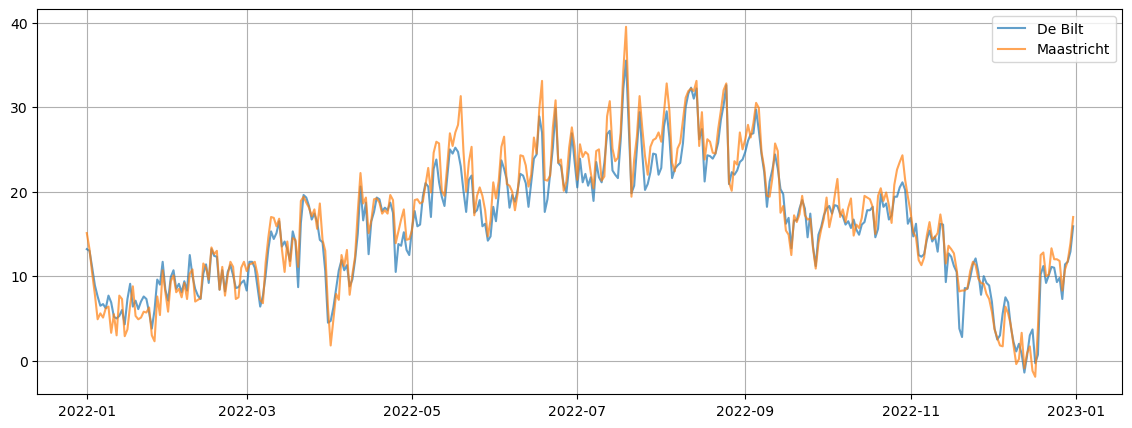

In [46]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df_pivot['DATUM'], df_pivot['De Bilt'], label='De Bilt', alpha=0.7)
ax.plot(df_pivot['DATUM'], df_pivot['Maastricht'], label='Maastricht', alpha=0.7)

ax.grid()
ax.legend()

plt.show()

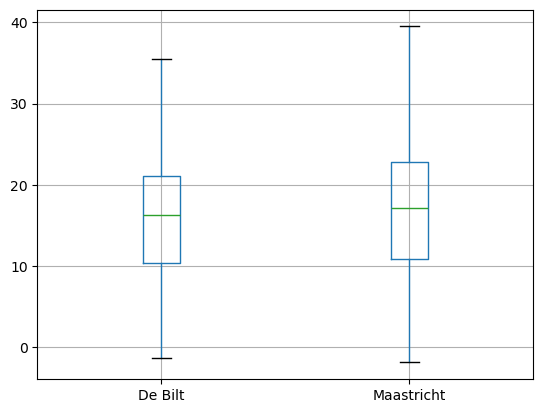

In [48]:
df_pivot.boxplot()
plt.show()

In [50]:
temp_verschil = df_pivot['De Bilt'] - df_pivot['Maastricht']

<Axes: >

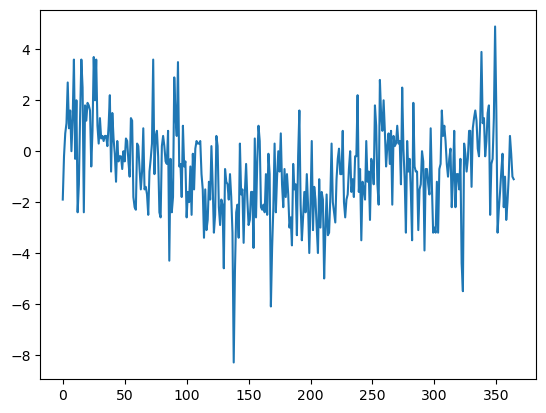

In [51]:
temp_verschil.plot()

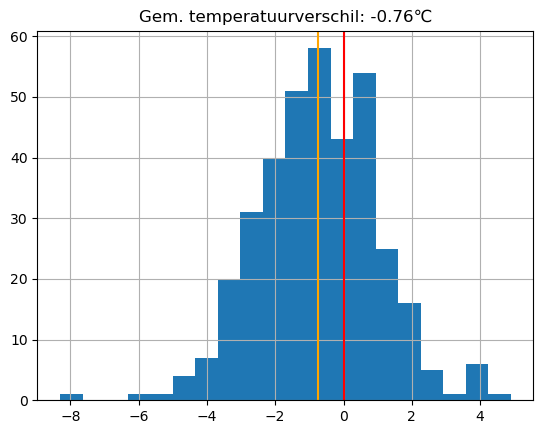

In [63]:
diff_mean = temp_verschil.mean()

fig, ax = plt.subplots()

ax.hist(temp_verschil, bins=20)
ax.axvline(0, color='red')
ax.axvline(diff_mean, color='orange')

ax.set_title(f'Gem. temperatuurverschil: {diff_mean:.2f}℃')

plt.grid()
plt.show()

# Is het significant kouder in De Bilt t.o.v. Maastricht?

In [77]:
from scipy import stats

result = stats.ttest_ind(df_pivot['De Bilt'], df_pivot['Maastricht'], alternative='less')

print(f't-statistic = {result.statistic:.2f}')
print(f'p-value = {result.pvalue:.5f}')
print(f'degrees of freedom = {result.df}')

t-statistic = -1.35
p-value = 0.08838
degrees of freedom = 728.0
